In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# steps to solve the problem statement
1. reading and understanding the data 
2. visualization and building conclusion about age  annual salary spending score gender 
3. model building using kmean clustering and hierrchy clustering algorithm 

# what is clustering 
cluestring is a method of forming group which contains data of similar or identical features. It belongs to unsupervised machine learning cateogry wherein we are least bother about target variable rather more interested in forming cluster.
# How cluestring algorithm works ?
It search for the similar patterns if any exists in the given data set and patterns can be shape, size, color, behavior etc and if within data set we find data are following similar pattern we combine those data together and form a cluster and in order to reduce the complexcity of the probelm we keeping on assigning the cluster number after form each cluester. 

both clustering and classification are very similar to each other the only difference is classification is based on supervised machine learning and clustering is based on unsupervised machine learning. 

# Application 
Clustering has got its application in the feild of -
1. market segmentation also know as market basket analysis 
2. statistical data analysis 
3. social network analysis 
# Types of clustering 
1. kmean 
2. hierarchy 
3. DBscan 

# Kmean clustering 
It is an unsupervised machine learnig algorithm which group unlabel data set ito different cluster. It is centroid based algorithm where the main objective is to combine the data point which are very close to the centroid of the particular cluster 
# How does Kmean clustering work 
1. initially we have to randomly select the value of k and based on that number of clustering at begining is decided 
2. then we have to select centroid randomly 
3. distance between centroid and data points is calculated and if the data points are close to the centroid then that data is cluster with the nearest centroid 
4. then we select new centroid in the cluster and again using euclidean distance concept we find the distance of each data points with new cluster form and the data points which are close to nnew centroid are combine together and new cluster is formed 
5. step 4 is repeated till any further movement of data point stops and final cluster is formed. 
# How to decide optimum number of K value 
to decide optimum number of k we use Elbow technique it is a plot between within cluster summ of square and k value which range from (1 to 10). The point at which we get sharp bend in the curve we chose it as optimum number of cluster 
# WCSS  - within cluster sum of square 
it is the square of euclidean distance between data point and centroid of each cluster and later taking sum. 
# Hierarchy Clustering 
It is also unsupervised machine learning algorithm which groups unlabelled data of similar type together into a cluster. In hierarchy clustering we use the concept of Dendogram in order to decide the optimum number of cluster required for clustering. Hierarchy clustering is based on 2 approah 
1. Aglomerative approach (it is also called bottom-top approach)
2. Divise approach (it is also called top-bottom approach)
In our model we have used Algomerative approach which is most popluar approach 
# Aglomerative approach 
In Aglomerative clustering approach initially each data points are considered as cluster and then depending on distance between cluster we star combining the clusters together. suppose 2 cluster are very close to each other then we will combine both the clusters together and form new cluster and this process repeats untill we get one single cluster which contains all the data point and it is represented in the form of dandogram. 
# linkage 
It means measure of distance between the data points in different cluster 
1. single linkage--> it is the measure of shortest distance or we can say minimum distance between the data points in clusters 
2. complete linkage --> it is the measure of longest distance or we can say maxmimum distance between two farthest data points in the cluster
3. centroid linkage --> it is the measure of distance between centroid of different cluster
4. ward linkage --> it is a type of linkage which is used when there is more variance in the data set we use ward linkage
# How to form dendogram 
it is formed by using distance matrix in which distance between each clusters is calcuated,based on the method of linkage opted either single, complete,centroid and ward  

In [2]:
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [3]:
import os
print(os.listdir('../input/'))
mall_data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

['customer-segmentation-tutorial-in-python']


# Data reading understanding 

In [4]:
# it is used to display the top osbervation based on the numerical value we pass 
mall_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
# for understanding statistical behaviour of data 
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


from above we can conclude based on obserbing the mean and median value that there is very small variance in age and annual income col but there is negligible variance in spending score. so variance wont be a major issue in the data set  

In [6]:
# it is used to get information about the data set staring from number of rows and column along with name of columns total number of observationn in 
# the data set and is there any null value exsiting in the data set and data type of each and every variable in the data set
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# to get info of null values in the data set 
mall_data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


# data visualization 

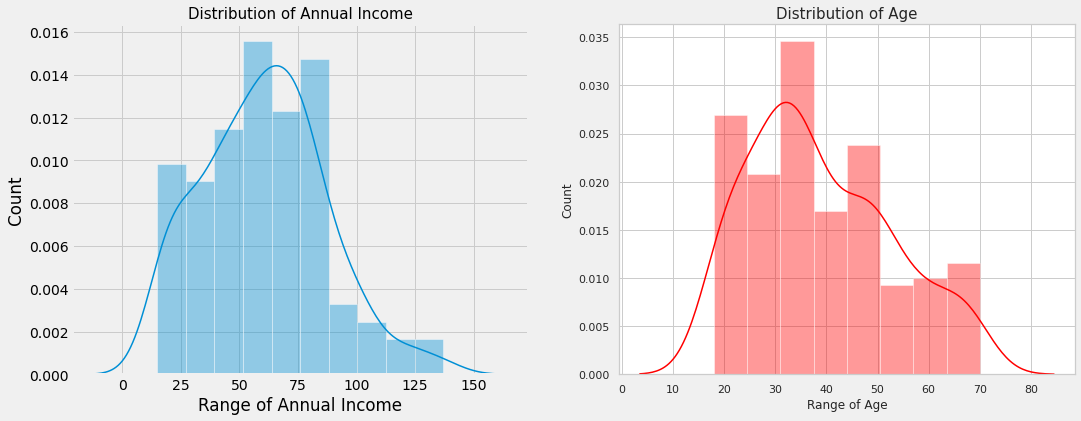

In [8]:

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16,6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(mall_data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(mall_data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

from the above plot we can conclude that most of the people are having annual earning in the range of 50-85k us dollar and very few are in the range of 100-125k us dollar and above
form the second plot we can conclude that most of the frequent customer of the shopping mall are of the age group ranging from 30-35 years below 30 the are visiting but not that often and senior citizen are least in this cateogry 

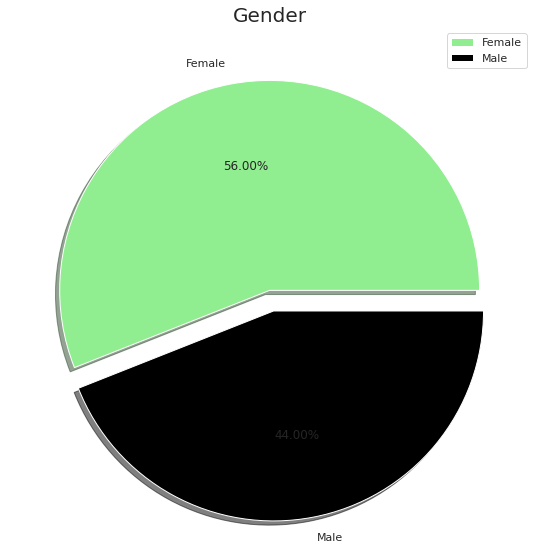

In [9]:
labels = ['Female', 'Male']
size = mall_data['Gender'].value_counts()
colors = ['lightgreen', 'black']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Above pie chart shows that although the males popluayion are in majority in comparision to females but above pie chart suggest when it comes to shopping females hold large ahare of around 56% which is slight higher as compared of males who hold 44% 


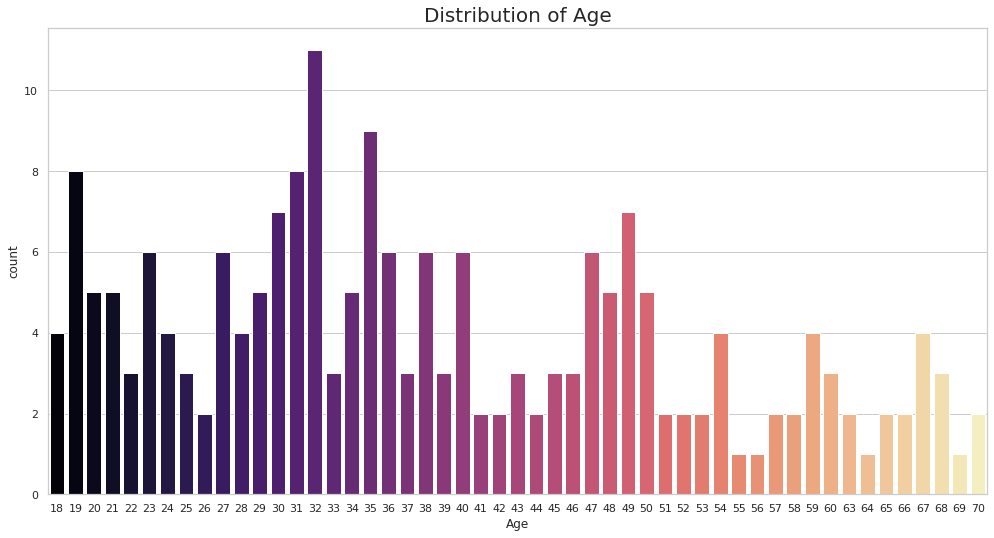

In [10]:
plt.figure(figsize = (15, 8))
sns.countplot(mall_data['Age'], palette = "magma")
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Above bar plot further give more clear understanding of which age group visit mall frequently and we can clearly see that people ranging from 27 to 40 are most frequent, and senior citizens are least frequent 
one interesting pattern is observed in the data set people of age group 18, 24, 28, 54, 59, 67 all age group are having equal frequency of visiting the mall in addition to that people of age group 55, 56, 64, 69 are least frequent furthermore, people of age group 32 are most frequent and that is followed by people of age group 35 years 

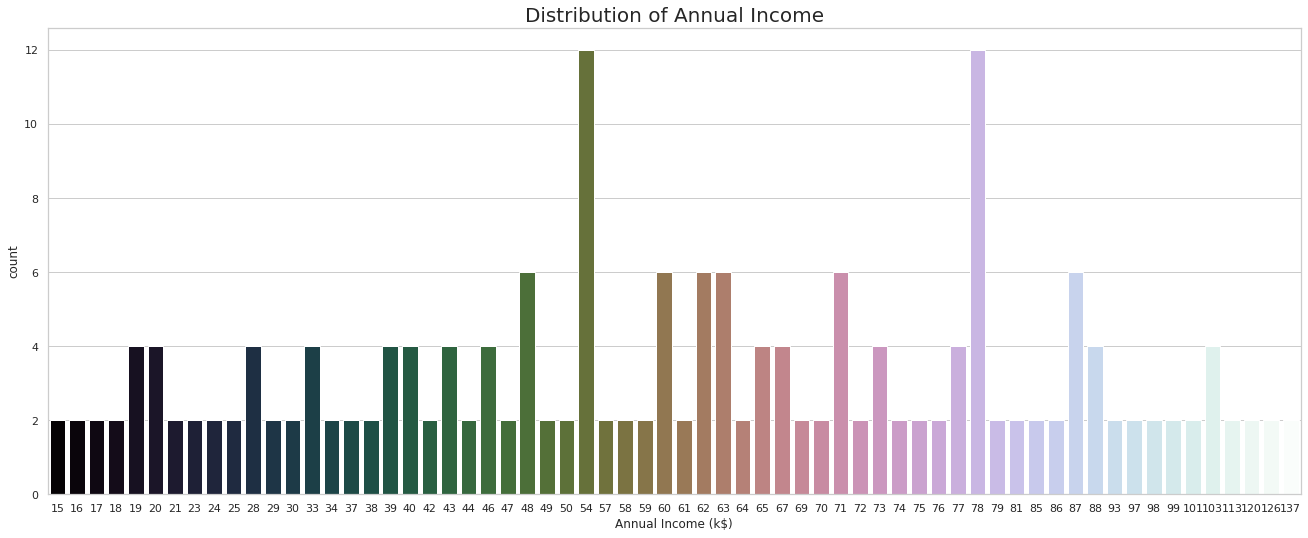

In [11]:
plt.figure(figsize = (20, 8))
sns.countplot(mall_data['Annual Income (k$)'], palette = 'cubehelix')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

from the above graph we can add further clarity on distribution of annual income wrt to age as we can see more people are having annual income of 54k us dollar and 78k us dollar and from the above plot we can also idtentify that very few people are above 78K us dollar and very less are below 54K us dollar 

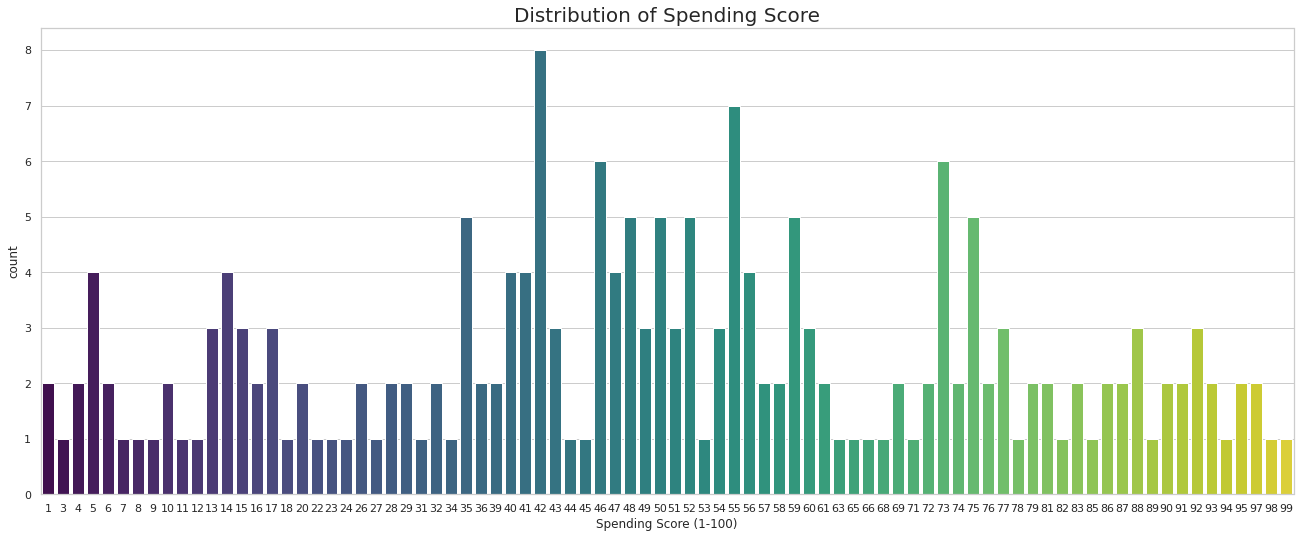

In [12]:
plt.figure(figsize = (20, 8))
sns.countplot(mall_data['Spending Score (1-100)'], palette = 'viridis')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

on an average we can say most of the people are having spending score in the range of 35 to 60.Further more there is an intersting observation that there exsits even 1 spending and 99 spwnding score as well 

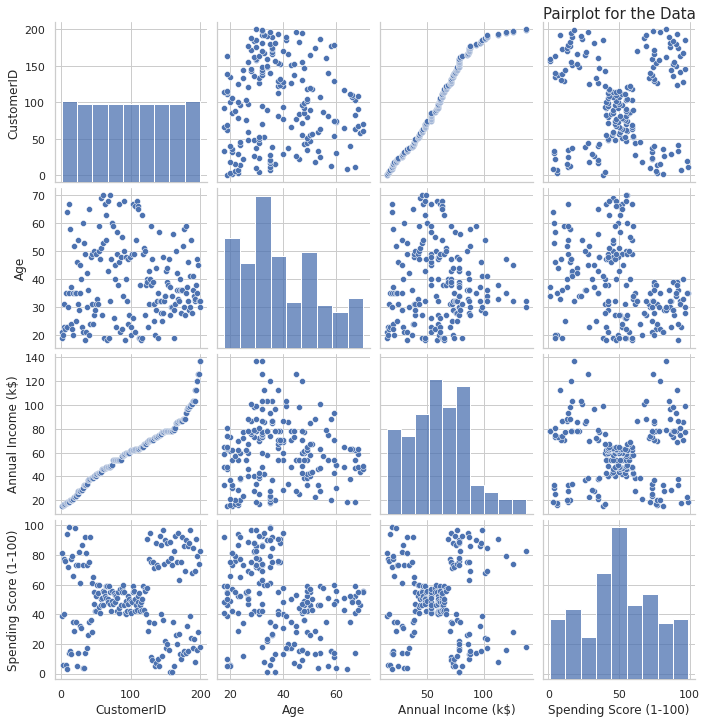

In [13]:
sns.pairplot(mall_data)
plt.title('Pairplot for the Data', fontsize =15,y=4.1)
plt.show()

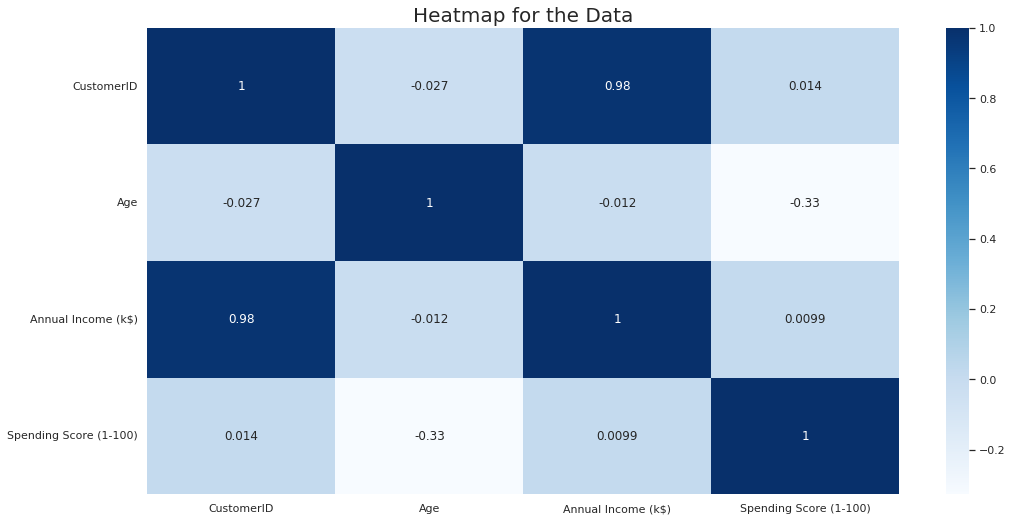

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(mall_data.corr(), cmap = 'Blues', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

from the above correlation heatmap we can conclude that only features which is having some relation among them are customer id and annual income apart from them non of the features are correleated with each other that mean there is no multicollinearity in the data set 

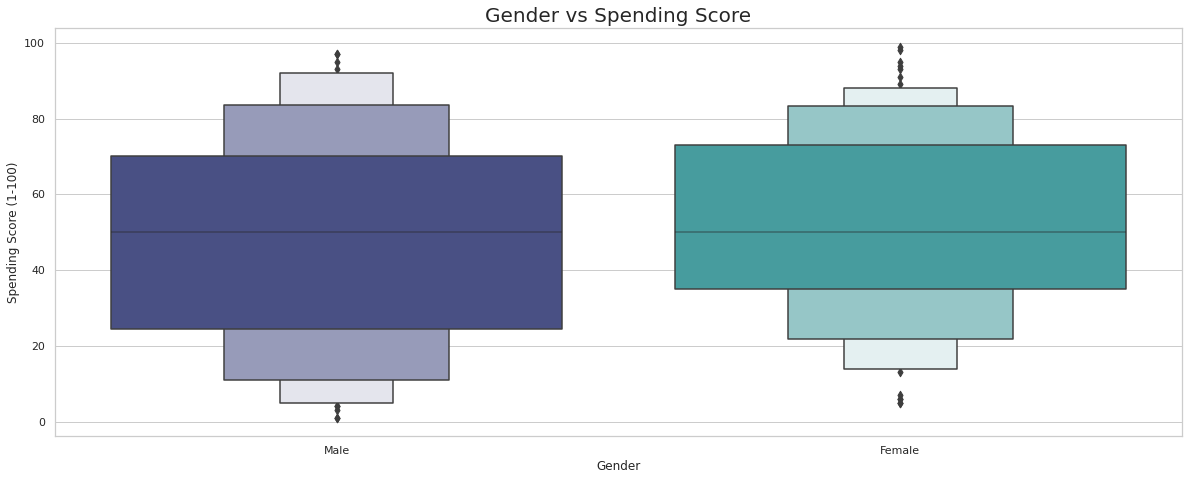

In [15]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(mall_data['Gender'], mall_data['Spending Score (1-100)'], palette = 'mako')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

from the above box plot we can conclude that male spending score varies from 25 to 70 whereas female spending score varies from 35 to 75 here also female prove to be inferior and hence the are shopping hollic as compared to male 

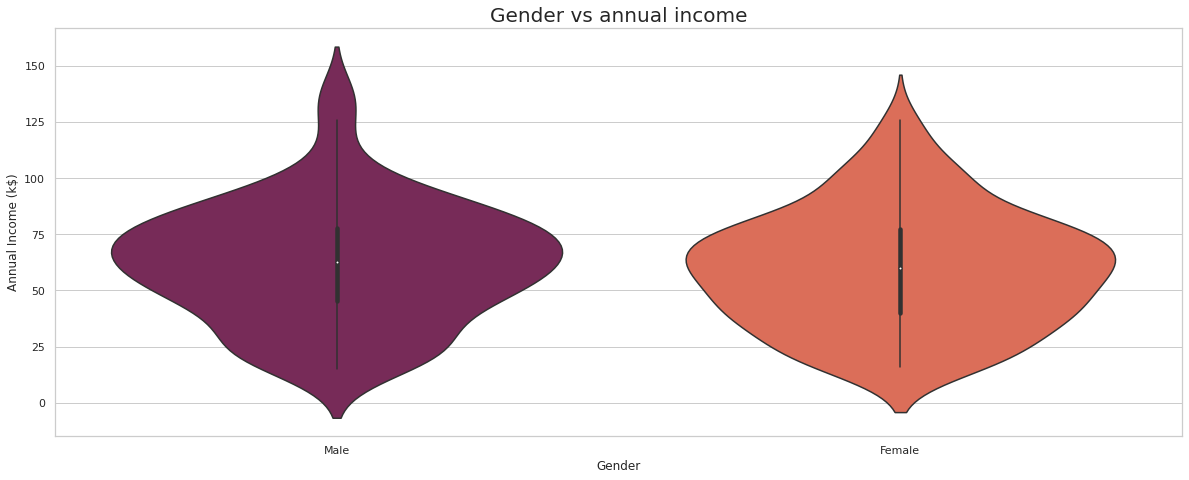

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(mall_data['Gender'], mall_data['Annual Income (k$)'], palette = 'rocket')
plt.title('Gender vs annual income', fontsize = 20)
plt.show()

here we can clearly see the annual earning of male is on the higher side as compared to that of the female 

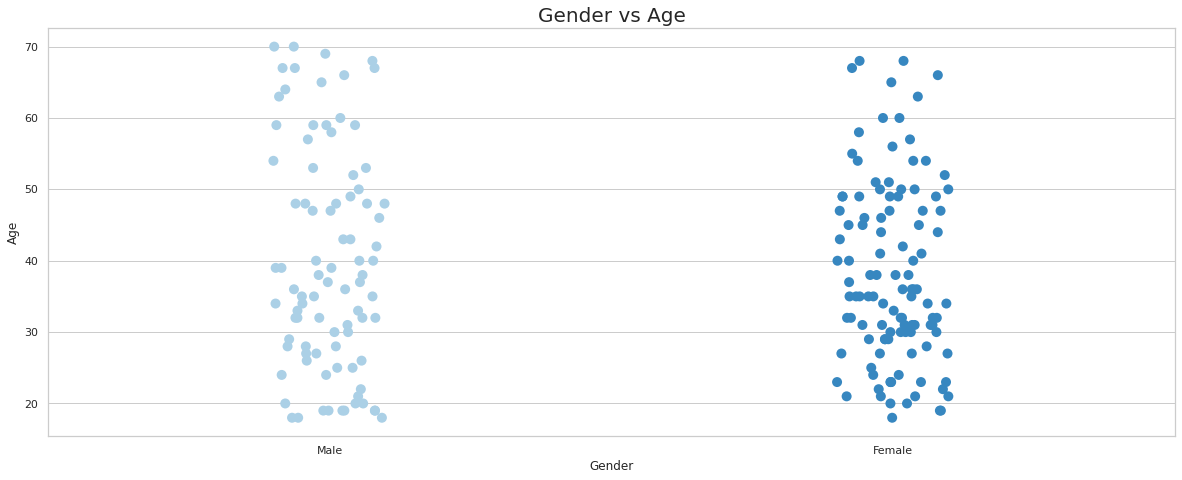

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(mall_data['Gender'], mall_data['Age'], palette = 'Blues', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

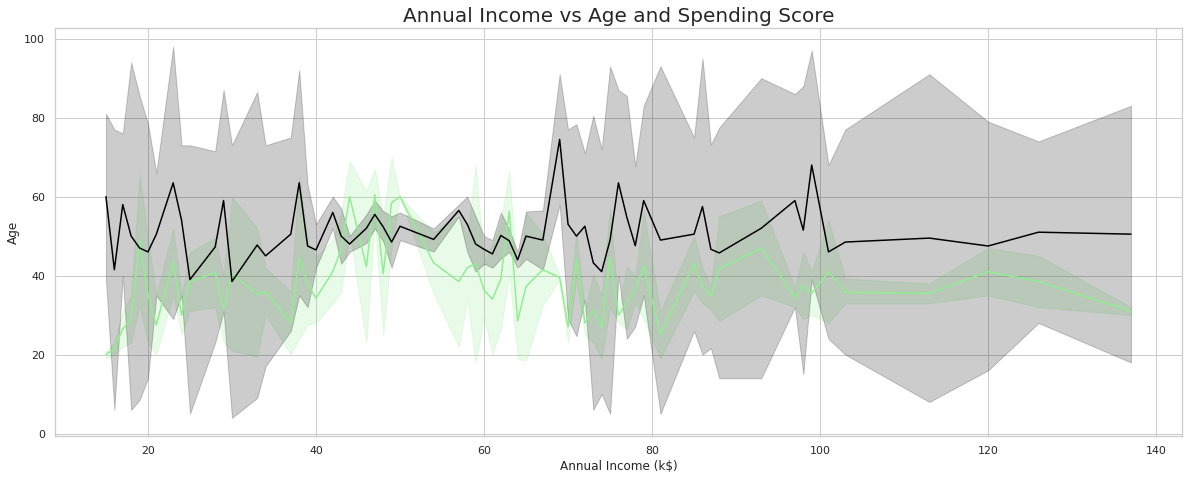

In [18]:
x = mall_data['Annual Income (k$)']
y = mall_data['Age']
z = mall_data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'lightgreen')
sns.lineplot(x, z, color = 'black')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

# model building

In [19]:
x = mall_data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


# elbow method to determine optimum k value 

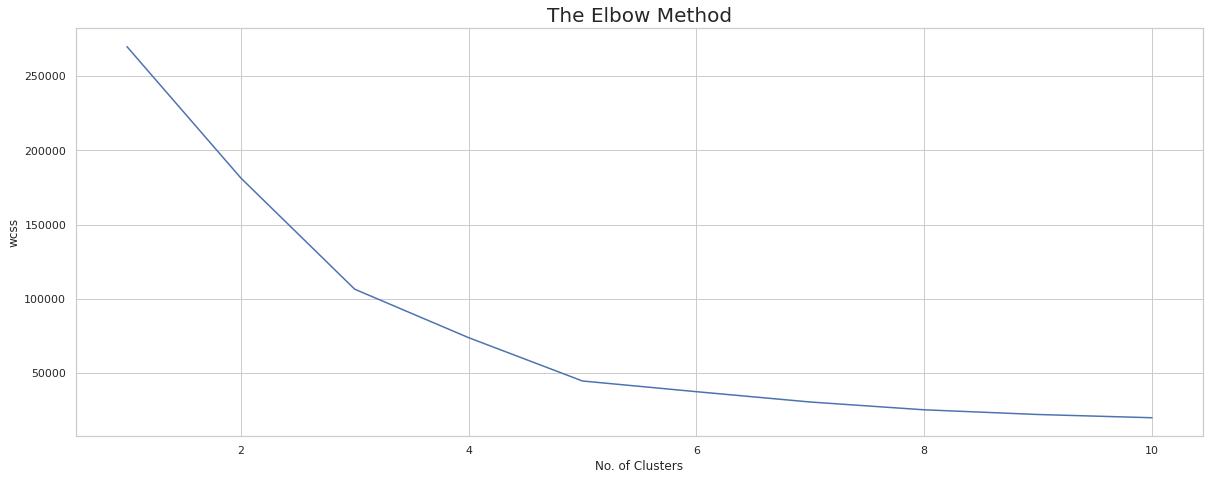

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

here we can see there is a sharp bend in the interval 4 to 6 so we are consedring k value as 5 

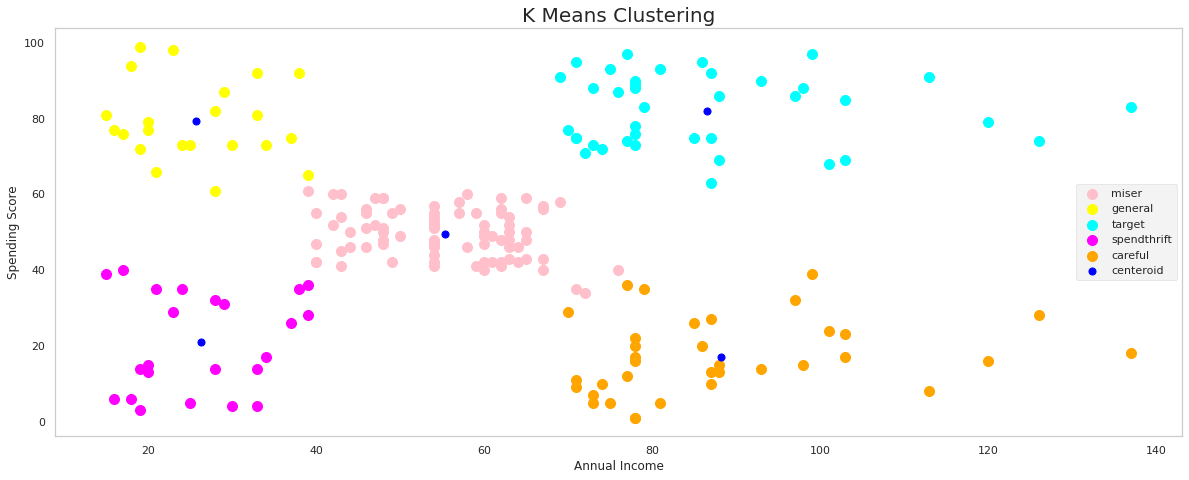

In [21]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

here from the above cluster we can target our customer and accordingly prepare our business atrategy to attract more crowrds towards the mall here our target population is customers who earns and having good spending score. Futhermore, we can build our strategy to attract miser aslo we will try to give some additional offers to get careful customers also. 

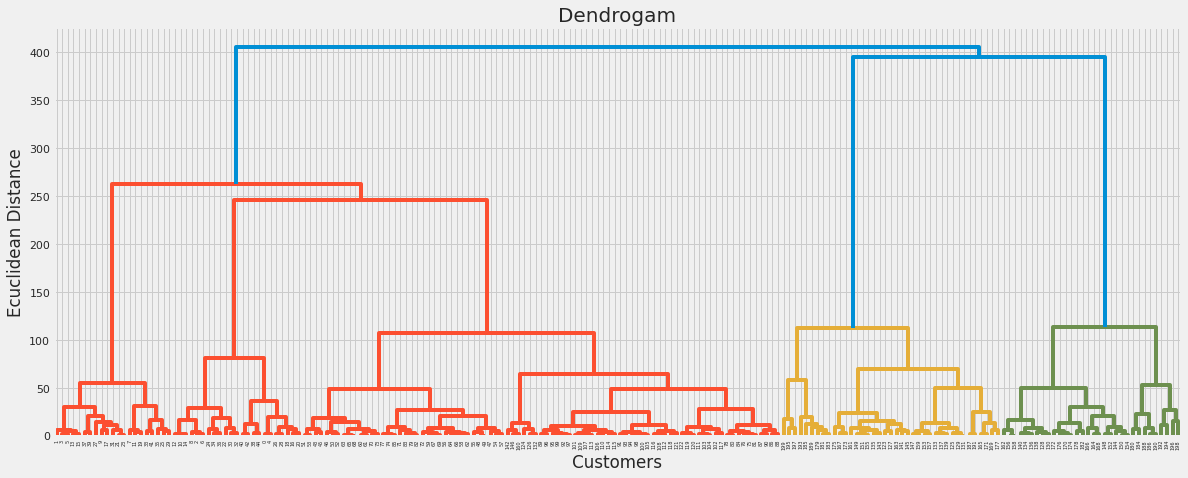

In [22]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

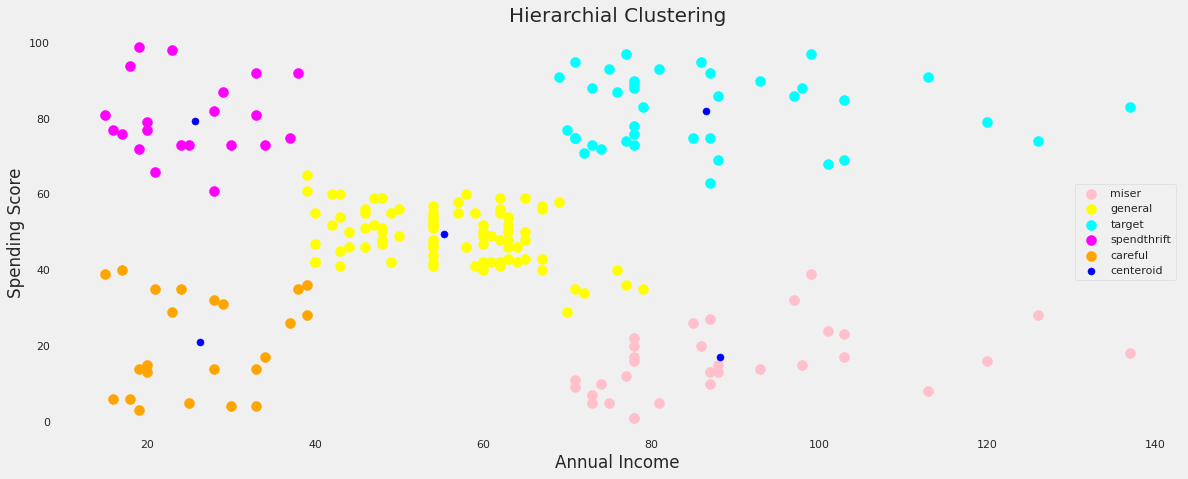

In [23]:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [24]:
x1 = mall_data.iloc[:, [2, 4]].values
x1.shape

(200, 2)

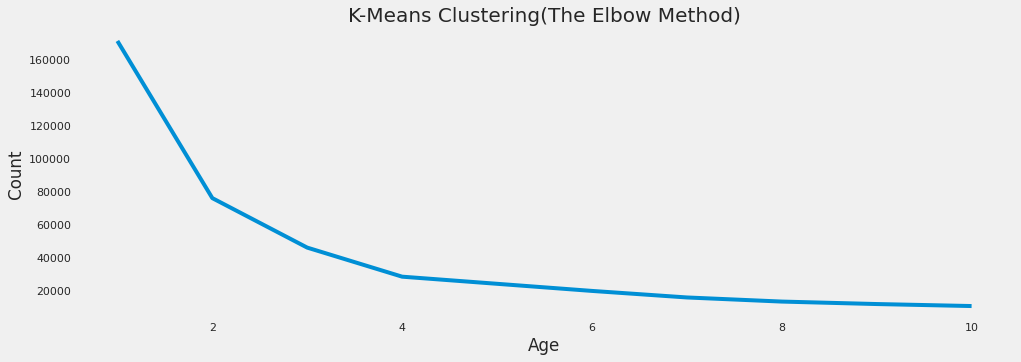

In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

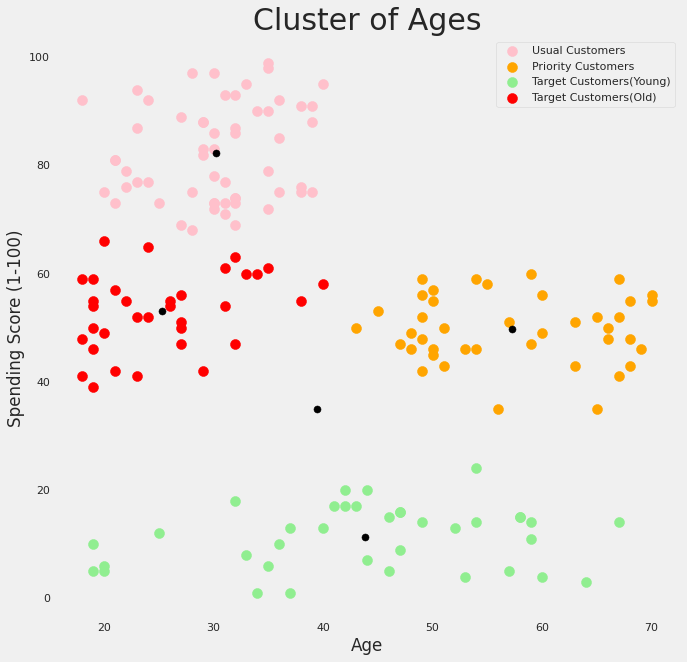

In [26]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x1)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x1[ymeans == 0, 0], x1[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x1[ymeans == 1, 0], x1[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x1[ymeans == 2, 0], x1[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x1[ymeans == 3, 0], x1[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
